In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/alenjose/Desktop/data/airbnb_EDA/listings.csv')
df.head(2)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,528022,https://www.airbnb.com/rooms/528022,20221205143541,2022-12-05,city scrape,Somewhere Else,Highlights<br />*Located only 5 minutes from C...,NaN,https://a0.muscache.com/pictures/bf6fa79c-5863...,2594559,...,4.90,4.78,4.72,0363 9289 A94D 5C21 A579,f,1,0,1,0,3.30
1,2818,https://www.airbnb.com/rooms/2818,20221205143541,2022-12-05,city scrape,Quiet Garden View Room & Super Fast Wi-Fi,Quiet Garden View Room & Super Fast Wi-Fi<br /...,"Indische Buurt (""Indies Neighborhood"") is a ne...",https://a0.muscache.com/pictures/10272854/8dcc...,3159,...,4.98,4.69,4.81,0363 5F3A 5684 6750 D14D,f,1,0,1,0,1.88


In [3]:
df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,6.809000e+03,6.809000e+03,6.809000e+03,6809.000000,6809.000000,0.0,6809.000000,6809.000000,6809.000000,0.0,...,6157.000000,6157.000000,6157.000000,6157.000000,6157.000000,6809.000000,6809.000000,6809.000000,6809.000000,6161.000000
mean,1.543801e+17,2.022121e+13,9.757724e+07,2.801146,4.819944,NaN,52.366847,4.890363,2.918784,NaN,...,4.760789,4.880387,4.890471,4.790138,4.650797,1.853576,0.975621,0.786606,0.040828,1.226475
std,2.861175e+17,1.793100e+00,1.315182e+08,18.066322,29.766061,NaN,0.017026,0.035550,1.401175,NaN,...,0.316494,0.216868,0.221001,0.247403,0.305070,2.561150,1.292887,2.168739,0.440437,2.335964
min,2.818000e+03,2.022121e+13,3.159000e+03,1.000000,1.000000,NaN,52.290340,4.755710,0.000000,NaN,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.510977e+07,2.022121e+13,9.287585e+06,1.000000,1.000000,NaN,52.356040,4.866890,2.000000,NaN,...,4.670000,4.850000,4.870000,4.670000,4.510000,1.000000,0.000000,0.000000,0.000000,0.280000
50%,3.373018e+07,2.022121e+13,3.321458e+07,1.000000,1.000000,NaN,52.366190,4.888210,2.000000,NaN,...,4.860000,4.950000,4.970000,4.860000,4.700000,1.000000,1.000000,0.000000,0.000000,0.610000
75%,5.313791e+07,2.022121e+13,1.336823e+08,2.000000,3.000000,NaN,52.376630,4.908470,4.000000,NaN,...,5.000000,5.000000,5.000000,5.000000,4.830000,1.000000,1.000000,1.000000,0.000000,1.410000
max,7.743397e+17,2.022121e+13,4.901557e+08,799.000000,799.000000,NaN,52.425120,5.026430,16.000000,NaN,...,5.000000,5.000000,5.000000,5.000000,5.000000,22.000000,14.000000,20.000000,8.000000,106.740000


In [7]:
# total number of columns
len(df.columns)

75

In [9]:
# columns with null values
len(df.columns[df.isnull().any()])

27

In [10]:
# check for duplicated rows
df.duplicated().sum()

0

# What is the distribution of Airbnb listings by property type?

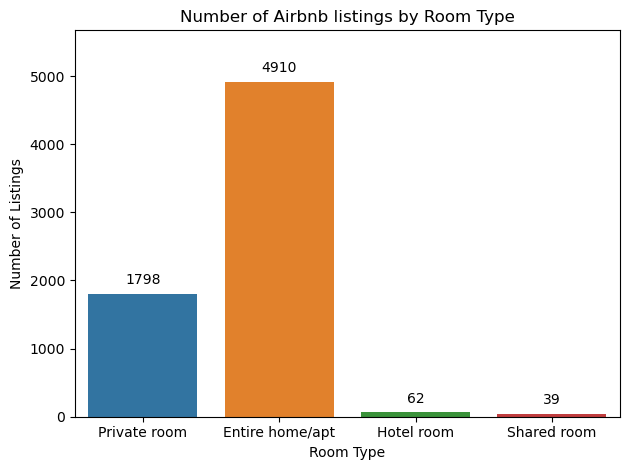

In [11]:
sns_plot = sns.countplot(x='room_type', data=df)

plt.title('Number of Airbnb listings by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Number of Listings')


for p in sns_plot.patches:
        sns_plot.annotate(format(p.get_height(), '.0f'), 
                          (p.get_x() + p.get_width() / 2., p.get_height()), 
                          ha = 'center', va = 'center', 
                          xytext = (0, 10), 
                          textcoords = 'offset points')
        
ylim = sns_plot.get_ylim()
sns_plot.set_ylim(ylim[0], ylim[1] * 1.1) 
        

plt.tight_layout()
plt.show()

# How does the price of Airbnb listings vary by property type and location?

In [12]:
# use str to call str functions on a column 
df['price'].str.contains('$').sum() 

6809

In [13]:
df['price'] = df['price'].apply(lambda x:x.replace('$',''))
df['price'] = df['price'].apply(lambda x:x.replace(',',''))
df['price'] = pd.to_numeric(df['price'])

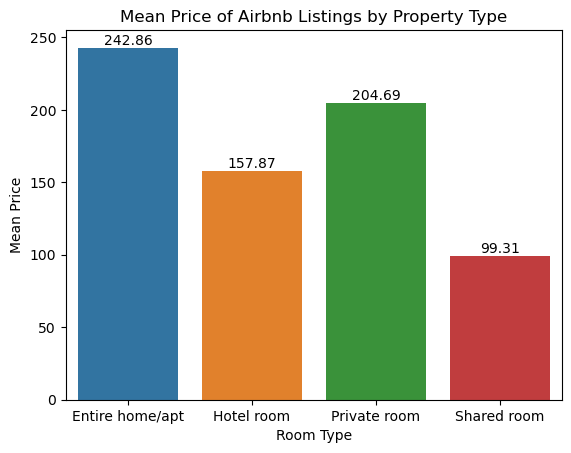

In [14]:
mean_prices_by_type = df.groupby('room_type')['price'].mean().reset_index()

# Plot the mean prices by room type using seaborn
sns_plot = sns.barplot(x='room_type', y='price', data=mean_prices_by_type)

# Add a title and labels to the plot
plt.title('Mean Price of Airbnb Listings by Property Type')
plt.xlabel('Room Type')
plt.ylabel('Mean Price')

# Add the values on top of the bars
if sns_plot is not None:
    for p in sns_plot.patches:
        sns_plot.annotate(format(p.get_height(), '.2f'), 
                          (p.get_x() + p.get_width() / 2., p.get_height()), 
                          ha = 'center', va = 'center', 
                          xytext = (0, 5), 
                          textcoords = 'offset points')

# What is the average availability of Airbnb listings by neighborhood and property type?


In [15]:
df['has_availability'].value_counts()

t    6756
f      53
Name: has_availability, dtype: int64

In [16]:
df['has_availability'] = df['has_availability'].apply(lambda x: 1 if x == 't' else 0)

In [17]:
merged = pd.merge(df.groupby('neighbourhood')['has_availability'].sum().reset_index(),
          df.groupby('neighbourhood')['has_availability'].count().reset_index(),
            on='neighbourhood', how='inner')
merged['percent'] = round((merged['has_availability_x'] / merged['has_availability_y']) * 100,1)
merged.sort_values('has_availability_x',ascending=False)[['neighbourhood','percent']].head(5)

,neighbourhood,percent
27,"Amsterdam, Noord-Holland, Netherlands",99.2
29,"Amsterdam, North Holland, Netherlands",99.8
21,"Amsterdam, NH, Netherlands",99.5
24,"Amsterdam, Netherlands",100.0
34,"Amsterdam-Zuidoost, Noord-Holland, Netherlands",100.0


In [18]:
merged = pd.merge(df.groupby('room_type')['has_availability'].sum().reset_index(),
          df.groupby('room_type')['has_availability'].count().reset_index(),
            on='room_type', how='inner')
merged = merged.rename(columns={'has_availability_x': 'available', 'has_availability_y': 'total_count'})
merged['percent_available'] = round((merged['available'] / merged['total_count']) * 100, 1)
merged.sort_values('available',ascending=False)

,room_type,available,total_count,percent_available
0,Entire home/apt,4863,4910,99.0
2,Private room,1793,1798,99.7
1,Hotel room,61,62,98.4
3,Shared room,39,39,100.0


# Which amenities are most commonly offered in Airbnb listings?

In [19]:
import ast
df['amenities'] = df['amenities'].apply(lambda x:ast.literal_eval(x)) 

In [20]:
amenities_lst = []
_ = df['amenities'].apply(lambda x: [amenities_lst.append(i) for i in x])


In [21]:
amenities_set = set()
for i in amenities_lst:
    amenities_set.add(i)
amenities_dict = {key: 0 for key in amenities_set}

for key in amenities_lst:
    amenities_dict[key] = amenities_dict[key] + 1

In [22]:
pd.DataFrame(list(amenities_dict.items()), columns=['amenities', 'total_count'])\
    .sort_values(by='total_count',ascending=False).head(15)\
        .set_index('amenities')

,total_count
amenities,
Essentials,6073
Smoke alarm,6063
Wifi,5962
Kitchen,5508
Hot water,5152
Hair dryer,5044
Dishes and silverware,5019
Hangers,4919
Long term stays allowed,4898


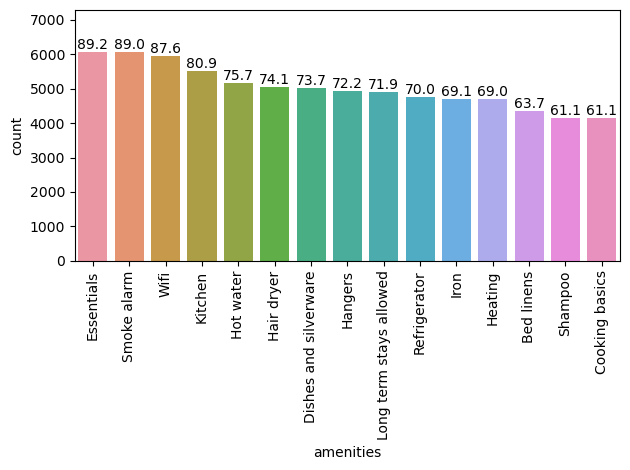

In [23]:
amenities_df = pd.DataFrame(list(amenities_dict.items()), columns=['amenities', 'count'])
top15 = amenities_df.sort_values(by='count', ascending=False).head(15)

# create figure and axis
fig, ax = plt.subplots()
sns.barplot(data=top15, x='amenities', y='count', ax=ax, linewidth=3)

for p in ax.patches:
    value = p.get_height() / df.shape[0]
    text = f'{round(value * 100,1)}'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(text, (x, y), ha='center', va='bottom')

ax.set_ylim(top=top15['count'].max() * 1.2)


# set the x-tick labels to vertical
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# show the plot
plt.tight_layout()
plt.show()


In [24]:
# How do the review scores for cleanliness, check-in, communication, and value vary by property type and host characteristics?
# What is the correlation between the number of bedrooms and bathrooms and the price of Airbnb listings?
# How does the availability of Airbnb listings change over time?
# What is the average length of stay for Airbnb guests?
# Which neighborhoods have the highest and lowest numbers of Airbnb listings?
# What is the average number of reviews per month for Airbnb listings and how does it vary by neighborhood and property type?